This is a demo for fast and step stxm scans on p99. It can be run on any python enironment with blueapi installed, as long as it have access to p99-blueapi.diamond.ac.uk.

In [23]:
from blueapi.client.client import BlueapiClient
from blueapi.client.event_bus import AnyEvent
from blueapi.config import ApplicationConfig, RestConfig, StompConfig
from blueapi.worker.task import Task
from bluesky_stomp.models import BasicAuthentication
from pydantic import HttpUrl

In [24]:
import h5py
import matplotlib.pyplot as plt
from time import time

In [26]:
p99Config =ApplicationConfig(
        stomp=StompConfig(
            enabled=True,
            url=HttpUrl("http://172.23.177.208:61613"),
            auth=BasicAuthentication(username="p99", password=password),  # type: ignore
        ),
        api=RestConfig(url=HttpUrl("https://p99-blueapi.diamond.ac.uk:443")),
    )

In [27]:
bc = BlueapiClient.from_config(config = p99Config)
all_events: list[AnyEvent] = []
starting_scan_no = 180
def on_event(event: AnyEvent):
    all_events.append(event)

In [32]:
bc.reload_environment()

EnvironmentResponse(environment_id=UUID('f5eea9d3-80db-4f24-b6c5-85d1ea3872b3'), initialized=True, error_message=None)

Quick look for the whole area. 

In [36]:
count= Task(
            name="count",
            params={
                "detectors": ["andor2_point"],
            },
        )
start= time()
bc.run_task(count, on_event=on_event)
stxm_stp_time = time()-start

In [39]:
stxm_fast= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.1,
                "step_motor": "sample_stage.x",
                "step_start": -5,
                "step_end": 5,
                "scan_motor": "sample_stage.y",
                "scan_start": -5,
                "scan_end": 5,
                "plan_time": 25,
            },
        )
start= time()
bc.run_task(stxm_fast, on_event=on_event)
stxm_stp_time = time()-start


3605.6609177589417


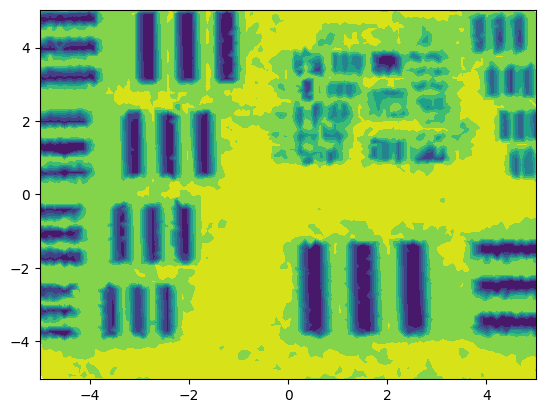

In [38]:
print(stxm_stp_time)
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-2.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])

Finer scan in the smaller area 4.2 to 0.2 in y -0.1 to 3.9 in x

In [34]:
stxm_fast= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.1,
                "step_motor": "sample_stage.x",
                "step_start": -0.1,
                "step_end": 3.9,
                "scan_motor": "sample_stage.y",
                "scan_start": 0.2,
                "scan_end": 4.5,
                "plan_time": 1800,
            },
        )
start= time()
bc.run_task(stxm_fast, on_event=on_event)
stxm_stp_time = time()-start


15.355530261993408


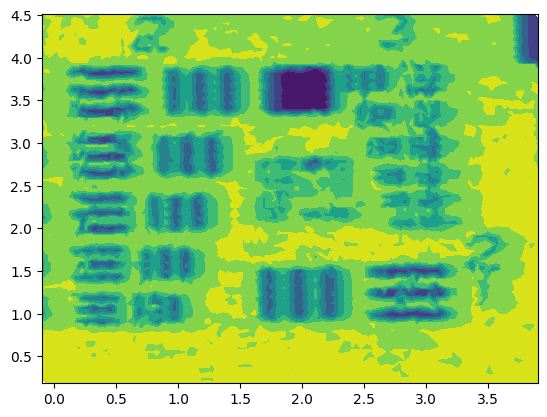

In [35]:
print(stxm_stp_time)
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-3.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])

Doing the same thing but will saveimages.

In [40]:
stxm_fast= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_det"],
                "count_time": 0.1,
                "step_motor": "sample_stage.x",
                "step_start": 0,
                "step_end": 3.5,
                "scan_motor": "sample_stage.y",
                "scan_start": 0.5,
                "scan_end": 4.1,
                "plan_time": 3600,
            },
        )
start= time()
bc.run_task(stxm_fast, on_event=on_event)
stxm_stp_time = time()-start


CA.Client.Exception...............................................
    Context: "p99-k8s-serv-01.diamond.ac.uk:44053"
    Source File: modules/ca/src/client/cac.cpp line 1237
    Current Time: Wed Jun 25 2025 14:14:35.274304927
..................................................................


In [41]:
print(stxm_stp_time)
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-7.nxs",  "r")
data =nexusData["entry/instrument"]

3518.4502713680267


In [43]:
nexusData['entry/plan_metadata'].keys()

<KeysViewHDF5 ['detector_dist', 'detectors', 'energy', 'motors', 'plan_name', 'plan_type', 'versions']>